In [1]:
import json, pandas as pd
import matplotlib.pyplot as plt

In [2]:
def highlight_max(s):
    is_max = s == s.max()
    return ['font-weight: bold' if v else '' for v in is_max]

In [3]:
baseline = {
    "date": "2023-12-23",
    "model": "mistral-7b-instruct-v0.2.Q6_K",
    "version": "baseline",
    "temperature": 0.0,
    "aware_acc": 0.7065868263473054,
    "aware_rho": 0.46095769289667354,
    "agnostic_acc": 0.6492985971943888, 
    "agnostic_rho": 0.3801408906585249,
    "avg_acc": 0.6779427117708471,
    "avg_rho": 0.42054929177759925
}

In [4]:
records = json.load(open('validation_runs.json', 'r'))
df = pd.DataFrame.from_records(records)
df.loc[len(df.index)] = baseline
df_for_table = df[[ 'date', 'version', 'model', 'temperature', 'agnostic_acc', 'agnostic_rho', 'aware_acc', 'aware_rho', "avg_acc", "avg_rho" ]].sort_values(by='date')
styled_df = df_for_table.style.apply(highlight_max, subset=['agnostic_acc', 'agnostic_rho', 'aware_acc', 'aware_rho', 'avg_acc', 'avg_rho'])
styled_df

,date,version,model,temperature,agnostic_acc,agnostic_rho,aware_acc,aware_rho,avg_acc,avg_rho
43,2023-12-23,baseline,mistral-7b-instruct-v0.2.Q6_K,0.000000,0.649299,0.380141,0.706587,0.460958,0.677943,0.420549
8,2024-01-09,v1,gpt-4,0.700000,0.801603,0.679521,0.762475,0.555941,0.782039,0.617731
0,2024-01-09,v1,gpt-3.5-turbo,0.700000,0.725451,0.549040,0.712575,0.541777,0.719013,0.545408
16,2024-01-10,v1-persona,gpt-3.5-turbo,0.700000,0.715431,0.575568,0.720559,0.535034,0.717995,0.555301
14,2024-01-10,v1-persona-examples,gpt-3.5-turbo,0.700000,0.671343,0.493688,0.712575,0.524608,0.691959,0.509148
2,2024-01-11,v3,gpt-3.5-turbo,1.200000,0.735471,0.600531,0.722555,0.516681,0.729013,0.558606
4,2024-01-11,v2,gpt-3.5-turbo,0.200000,0.711423,0.488756,0.742515,0.528502,0.726969,0.508629
6,2024-01-11,v2,gpt-3.5-turbo,0.700000,0.701403,0.526440,0.742515,0.569994,0.721959,0.548217
7,2024-01-11,v1-conservative,gpt-3.5-turbo,0.700000,0.701403,0.540491,0.734531,0.568859,0.717967,0.554675
9,2024-01-11,v3,gpt-3.5-turbo,0.700000,0.745491,0.584922,0.718563,0.508341,0.732027,0.546631


In [5]:
print(df_for_table.to_markdown())

|    | date       | version                            | model                         |   temperature |   agnostic_acc |   agnostic_rho |   aware_acc |   aware_rho |   avg_acc |   avg_rho |
|---:|:-----------|:-----------------------------------|:------------------------------|--------------:|---------------:|---------------:|------------:|------------:|----------:|----------:|
| 43 | 2023-12-23 | baseline                           | mistral-7b-instruct-v0.2.Q6_K |           0   |       0.649299 |       0.380141 |    0.706587 |    0.460958 |  0.677943 |  0.420549 |
|  8 | 2024-01-09 | v1                                 | gpt-4                         |           0.7 |       0.801603 |       0.679521 |    0.762475 |    0.555941 |  0.782039 |  0.617731 |
|  0 | 2024-01-09 | v1                                 | gpt-3.5-turbo                 |           0.7 |       0.725451 |       0.54904  |    0.712575 |    0.541777 |  0.719013 |  0.545408 |
| 16 | 2024-01-10 | v1-persona               

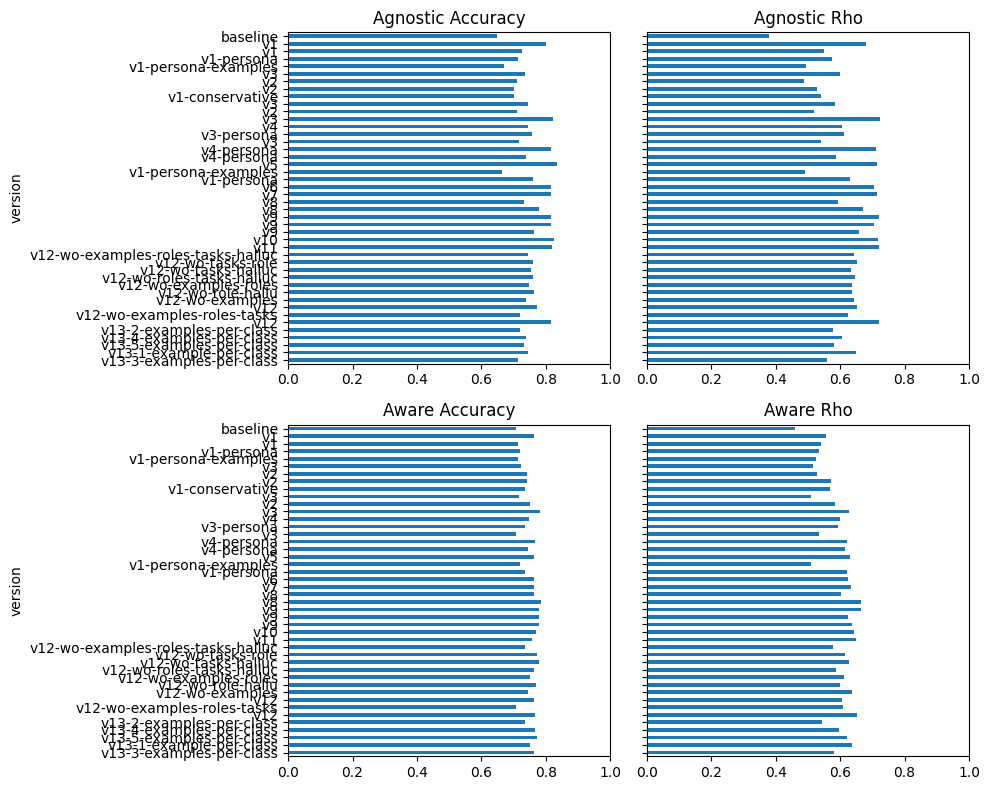

In [6]:
df_agnostic_acc = df[['version', 'date', 'agnostic_acc']].sort_values(by='date', ascending=False)
df_agnostic_rho = df[['version', 'date', 'agnostic_rho']].sort_values(by='date', ascending=False)
df_aware_acc = df[['version', 'date', 'aware_acc']].sort_values(by='date', ascending=False)
df_aware_rho = df[['version', 'date', 'aware_rho']].sort_values(by='date', ascending=False)

# Create a 2x2 subplot layout
fig, axs = plt.subplots(2, 2, figsize=(10, 8))

# Plotting each DataFrame on a specific subplot
df_agnostic_acc.plot(kind='barh', x='version', legend=False, ax=axs[0, 0])
axs[0, 0].set_title('Agnostic Accuracy')
axs[0, 0].set_xlim(0, 1)

df_agnostic_rho.plot(kind='barh', legend=False, ax=axs[0, 1])
axs[0, 1].set_title('Agnostic Rho')
axs[0, 1].set_yticklabels([])
axs[0, 1].set_xlim(0, 1)

df_aware_acc.plot(kind='barh', x='version', legend=False, ax=axs[1, 0])
axs[1, 0].set_title('Aware Accuracy')
axs[1, 0].set_xlim(0, 1)

df_aware_rho.plot(kind='barh', legend=False, ax=axs[1, 1])
axs[1, 1].set_title('Aware Rho')
axs[1, 1].set_yticklabels([])
axs[1, 1].set_xlim(0, 1)

# Adjust layout to prevent overlap
plt.tight_layout()

# Show the plot
plt.show()


In [13]:
df2 = df.query('date == "2024-01-27"')
df2

,version,model,date,temperature,aware_acc,aware_rho,agnostic_acc,agnostic_rho,avg_acc,avg_rho,val.model-aware,val.model-agnostic
38,v13-1-example-per-class,gpt-3.5-turbo,2024-01-27,1.2,0.752495,0.636934,0.743487,0.650136,0.747991,0.643535,"[{'label': 'Hallucination', 'p(Hallucination)'...","[{'label': 'Not Hallucination', 'p(Hallucinati..."
39,v13-2-examples-per-class,gpt-3.5-turbo,2024-01-27,1.2,0.734531,0.544549,0.721443,0.576513,0.727987,0.560531,"[{'label': 'Hallucination', 'p(Hallucination)'...","[{'label': 'Not Hallucination', 'p(Hallucinati..."
40,v13-3-examples-per-class,gpt-3.5-turbo,2024-01-27,1.2,0.764471,0.581092,0.715431,0.558950,0.739951,0.570021,"[{'label': 'Hallucination', 'p(Hallucination)'...","[{'label': 'Not Hallucination', 'p(Hallucinati..."
41,v13-4-examples-per-class,gpt-3.5-turbo,2024-01-27,1.2,0.766467,0.594896,0.737475,0.605604,0.751971,0.600250,"[{'label': 'Not Hallucination', 'p(Hallucinati...","[{'label': 'Not Hallucination', 'p(Hallucinati..."
42,v13-5-examples-per-class,gpt-3.5-turbo,2024-01-27,1.2,0.774451,0.622071,0.733467,0.582187,0.753959,0.602129,"[{'label': 'Not Hallucination', 'p(Hallucinati...","[{'label': 'Not Hallucination', 'p(Hallucinati..."


In [8]:
df2.describe()

,temperature,aware_acc,aware_rho,agnostic_acc,agnostic_rho,avg_acc,avg_rho
count,1.000000e+01,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000
mean,1.200000e+00,0.755888,0.611392,0.758317,0.648444,0.757102,0.629918
std,2.340556e-16,0.021499,0.022655,0.025300,0.027086,0.021030,0.022051
min,1.200000e+00,0.708583,0.576088,0.721443,0.625697,0.715013,0.608996
25%,1.200000e+00,0.746008,0.600047,0.746493,0.635750,0.743996,0.616875
50%,1.200000e+00,0.763473,0.609621,0.756513,0.642363,0.763985,0.626267
75%,1.200000e+00,0.769461,0.623433,0.762525,0.649715,0.766991,0.631987
max,1.200000e+00,0.780439,0.651745,0.817635,0.721873,0.792051,0.686809


In [14]:
df3 = df2[[ 'version', 'model', 'agnostic_acc', 'agnostic_rho', 'aware_acc', 'aware_rho', "avg_acc", "avg_rho" ]].round(3)
df3

,version,model,agnostic_acc,agnostic_rho,aware_acc,aware_rho,avg_acc,avg_rho
38,v13-1-example-per-class,gpt-3.5-turbo,0.743,0.650,0.752,0.637,0.748,0.644
39,v13-2-examples-per-class,gpt-3.5-turbo,0.721,0.577,0.735,0.545,0.728,0.561
40,v13-3-examples-per-class,gpt-3.5-turbo,0.715,0.559,0.764,0.581,0.740,0.570
41,v13-4-examples-per-class,gpt-3.5-turbo,0.737,0.606,0.766,0.595,0.752,0.600
42,v13-5-examples-per-class,gpt-3.5-turbo,0.733,0.582,0.774,0.622,0.754,0.602


In [15]:
df3.loc[len(df.index)] = baseline
df3_for_table = df3.sort_values(by='avg_acc', ascending=False)
styled_df3 = df3_for_table.style.apply(highlight_max, subset=['agnostic_acc', 'agnostic_rho', 'aware_acc', 'aware_rho', "avg_acc", "avg_rho"])
styled_df3

,version,model,agnostic_acc,agnostic_rho,aware_acc,aware_rho,avg_acc,avg_rho
42,v13-5-examples-per-class,gpt-3.5-turbo,0.733000,0.582000,0.774000,0.622000,0.754000,0.602000
41,v13-4-examples-per-class,gpt-3.5-turbo,0.737000,0.606000,0.766000,0.595000,0.752000,0.600000
38,v13-1-example-per-class,gpt-3.5-turbo,0.743000,0.650000,0.752000,0.637000,0.748000,0.644000
40,v13-3-examples-per-class,gpt-3.5-turbo,0.715000,0.559000,0.764000,0.581000,0.740000,0.570000
39,v13-2-examples-per-class,gpt-3.5-turbo,0.721000,0.577000,0.735000,0.545000,0.728000,0.561000
44,baseline,mistral-7b-instruct-v0.2.Q6_K,0.649299,0.380141,0.706587,0.460958,0.677943,0.420549


In [11]:
print(df3.to_latex(index=False))

\begin{tabular}{llrrrrrr}
\toprule
version & model & agnostic_acc & agnostic_rho & aware_acc & aware_rho & avg_acc & avg_rho \\
\midrule
v12 & gpt-3.5-turbo & 0.774000 & 0.652000 & 0.764000 & 0.606000 & 0.769000 & 0.629000 \\
v12-wo-examples & gpt-3.5-turbo & 0.739000 & 0.643000 & 0.745000 & 0.637000 & 0.742000 & 0.640000 \\
v12-wo-examples-roles & gpt-3.5-turbo & 0.749000 & 0.636000 & 0.750000 & 0.611000 & 0.750000 & 0.624000 \\
v12-wo-examples-roles-tasks & gpt-3.5-turbo & 0.721000 & 0.626000 & 0.709000 & 0.608000 & 0.715000 & 0.617000 \\
v12-wo-examples-roles-tasks-halluc & gpt-3.5-turbo & 0.745000 & 0.642000 & 0.737000 & 0.576000 & 0.741000 & 0.609000 \\
v12-wo-roles-tasks-halluc & gpt-3.5-turbo & 0.760000 & 0.645000 & 0.762000 & 0.586000 & 0.761000 & 0.615000 \\
v12-wo-tasks-halluc & gpt-3.5-turbo & 0.754000 & 0.632000 & 0.780000 & 0.626000 & 0.767000 & 0.629000 \\
v12-wo-tasks-role & gpt-3.5-turbo & 0.760000 & 0.651000 & 0.774000 & 0.614000 & 0.767000 & 0.633000 \\
v12-wo-role-ha